In [1]:
import mne

In [2]:
filepath = r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\cnt.mat"

In [3]:
#Save the raw data in the dictionary
import numpy as np
from scipy.io import loadmat
import pandas as pd

nirs_matlab_files = loadmat(filepath)
    
nirs_channels = [item.flat[0] for item in nirs_matlab_files['cnt'][0][0]['clab'][0][0][0]]    

In [4]:
channels = []

for i in range(36):
    channels.append(nirs_channels[i])
    channels.append(nirs_channels[i+36])

In [5]:
# Montage data

mnt = loadmat(r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\mnt.mat")

pos_3d = (mnt['mnt']['pos_3d'][0][0].T)/10

#Load source info

sources = (mnt['mnt']['source'][0][0][0][0][2].T)/10

#Load detector info

detectors = (mnt['mnt']['detector'][0][0][0][0][2].T)/10

In [6]:
pos_3d

array([[-4.53984172e-02,  8.91009747e-02,  5.06226775e-06],
       [-3.35748481e-02,  9.31393778e-02,  1.40636367e-02],
       [-1.80965897e-02,  9.24178683e-02,  3.36370489e-02],
       [-1.56422671e-02,  9.87690203e-02,  1.01244447e-05],
       [-0.00000000e+00,  9.80786108e-02,  1.95086160e-02],
       [ 1.56472054e-02,  9.87682385e-02,  5.06218228e-06],
       [ 1.80922060e-02,  9.24163938e-02,  3.36434577e-02],
       [ 3.35764285e-02,  9.31387081e-02,  1.40642987e-02],
       [ 4.54024360e-02,  8.90989271e-02,  0.00000000e+00],
       [-0.00000000e+00, -9.80795866e-02,  1.95037098e-02],
       [-1.56422672e-02, -9.87690208e-02,  0.00000000e+00],
       [ 1.56422672e-02, -9.87690208e-02,  0.00000000e+00],
       [-9.11263370e-02, -1.71144288e-02,  3.74578035e-02],
       [-9.11265755e-02,  1.71325680e-02,  3.74489298e-02],
       [-8.31500620e-02,  1.02005842e-05,  5.55523815e-02],
       [-7.80929869e-02,  3.55430712e-02,  5.13631726e-02],
       [-6.97413425e-02,  1.83870016e-02

In [7]:
sources

array([[       nan,        nan,        nan],
       [-5.878e-02,  8.090e-02,  0.000e+00],
       [-3.554e-02,  8.920e-02,  2.782e-02],
       [-0.000e+00,  1.000e-01,  1.000e-05],
       [ 3.553e-02,  8.919e-02,  2.783e-02],
       [ 5.878e-02,  8.090e-02,  0.000e+00],
       [-0.000e+00, -1.000e-01,  0.000e+00],
       [       nan,        nan,        nan],
       [-9.237e-02,  1.000e-05,  3.826e-02],
       [-6.638e-02,  3.612e-02,  6.545e-02],
       [-6.635e-02, -3.609e-02,  6.543e-02],
       [-3.824e-02,  2.000e-05,  9.231e-02],
       [ 3.824e-02,  1.000e-05,  9.231e-02],
       [ 6.638e-02,  3.612e-02,  6.545e-02],
       [ 6.635e-02, -3.608e-02,  6.543e-02],
       [ 9.237e-02,  1.000e-05,  3.826e-02]])

In [8]:
pairs = mnt['mnt']['sd'][0][0]

In [9]:
n_channels = ['S2_D1 760','S2_D1 850','S3_D1 760','S3_D1 850','S3_D2 760','S3_D2 850','S4_D1 760',
              'S4_D1 850','S4_D2 760','S4_D2 850','S4_D3 760','S4_D3 850','S5_D2 760','S5_D2 850',
              'S5_D3 760','S5_D3 850','S6_D3 760','S6_D3 850','S7_D4 760','S7_D4 850','S7_D6 760',
              'S7_D6 850','S7_D7 760','S7_D7 850','S9_D5 760','S9_D5 850','S9_D9 760','S9_D9 850',
              'S9_D10 760','S9_D10 850','S10_D9 760','S10_D9 850','S10_D10 760','S10_D10 850',
              'S10_D11 760','S10_D11 850','S11_D5 760','S11_D5 850','S11_D10 760','S11_D10 850',
              'S11_D12 760','S11_D12 850','S12_D10 760','S12_D10 850','S12_D11 760','S12_D11 850',
              'S12_D12 760','S12_D12 850','S13_D13 760','S13_D13 850','S13_D14 760','S13_D14 850',
              'S13_D15 760','S13_D15 850','S14_D13 760','S14_D13 850','S14_D15 760','S14_D15 850',
              'S14_D16 760','S14_D16 850','S15_D8 760','S15_D8 850','S15_D14 760','S15_D14 850',
              'S15_D15 760','S15_D15 850','S16_D8 760','S16_D8 850','S16_D15 760','S16_D15 850',
              'S16_D16 760','S16_D16 850']

In [10]:
ch_motor = n_channels[24:]

In [11]:
print(pairs)

[[ 2  1]
 [ 3  1]
 [ 3  2]
 [ 4  1]
 [ 4  2]
 [ 4  3]
 [ 5  2]
 [ 5  3]
 [ 6  3]
 [ 7  4]
 [ 7  6]
 [ 7  7]
 [ 9  5]
 [ 9  9]
 [ 9 10]
 [10  9]
 [10 10]
 [10 11]
 [11  5]
 [11 10]
 [11 12]
 [12 10]
 [12 11]
 [12 12]
 [13 13]
 [13 14]
 [13 15]
 [14 13]
 [14 15]
 [14 16]
 [15  8]
 [15 14]
 [15 15]
 [16  8]
 [16 15]
 [16 16]]


In [12]:
# Initialize an info structure

#Info Structure for Low Work Load Raw Data
info = mne.create_info(
    ch_names=n_channels,
    ch_types=['fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw',
             'fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw','fnirs_raw'],
    sfreq=int(10))

In [13]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: S2_D1 760, S2_D1 850, S3_D1 760, S3_D1 850, S3_D2 760, S3_D2 ...
 chs: 72 FNIRS_RAW
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 5.0 Hz
 meas_date: unspecified
 nchan: 72
 projs: []
 sfreq: 10.0 Hz
>

In [14]:
#Manually assign 3D coordinates to the info structure
x=0
for ch in range(36):
    for coor in range(3):
        info['chs'][x]['loc'][coor] = pos_3d[ch][coor]
        info['chs'][x+1]['loc'][coor] = pos_3d[ch][coor]
    x+=2

In [15]:
#Assign manually source locations

x=0
for ch in range(36):
    for coor in range(3):
        info['chs'][x]['loc'][coor+3] = sources[pairs[ch][0]-1][coor]
        info['chs'][x+1]['loc'][coor+3] = sources[pairs[ch][0]-1][coor]
    x+=2

In [16]:
#Assign manually detector locations

x=0
for ch in range(36):
    for coor in range(3):
        info['chs'][x]['loc'][coor+6] = detectors[pairs[ch][1]-1][coor]
        info['chs'][x+1]['loc'][coor+6] = detectors[pairs[ch][1]-1][coor]
    x+=2

In [17]:
#Assign wavelengths
for x in info['chs'][0::2]:
    x['loc'][9] = 760

for x in info['chs'][1::2]:
    x['loc'][9] = 850

In [18]:
info['chs']

[{'loc': array([-4.53984172e-02,  8.91009747e-02,  5.06226775e-06, -5.87800000e-02,
          8.09000000e-02,  0.00000000e+00, -3.09000000e-02,  9.51100000e-02,
          1.00000000e-05,  7.60000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S2_D1 760',
  'scanno': 1,
  'logno': 1},
 {'loc': array([-4.53984172e-02,  8.91009747e-02,  5.06226775e-06, -5.87800000e-02,
          8.09000000e-02,  0.00000000e+00, -3.09000000e-02,  9.51100000e-02,
          1.00000000e-05,  8.50000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S2_D1 850',
  'scanno': 2,
  'logno': 2},
 {'loc': array([-3.3

In [19]:
#Data divided in three sessions
nirs_matcnt = {}
x=0

for i in range(3):
    nirs_matcnt["session{0}".format(i+1)] = pd.DataFrame([[row.flat[0] for row in line] for line
                                                        in nirs_matlab_files['cnt'][0][x]['x'][0][0]],
                                                        columns=nirs_channels)
    x+=2

In [20]:
#Reorder columns

for i in range(3): 
    nirs_matcnt["session{0}".format(i+1)]=nirs_matcnt["session{0}".format(i+1)][['AF7Fp1lowWL','AF7Fp1highWL','AF3Fp1lowWL',
                                                                     'AF3Fp1highWL','AF3AFzlowWL','AF3AFzhighWL',
                                                                     'FpzFp1lowWL','FpzFp1highWL','FpzAFzlowWL',
                                                                     'FpzAFzhighWL','FpzFp2lowWL','FpzFp2highWL', 
                                                                     'AF4AFzlowWL','AF4AFzhighWL','AF4Fp2lowWL',
                                                                     'AF4Fp2highWL','AF8Fp2lowWL','AF8Fp2highWL',
                                                                     'OzPOzlowWL','OzPOzhighWL','OzO1lowWL',
                                                                     'OzO1highWL','OzO2lowWL','OzO2highWL',
                                                                     'C5CP5lowWL','C5CP5highWL','C5FC5lowWL',
                                                                     'C5FC5highWL','C5C3lowWL','C5C3highWL',
                                                                     'FC3FC5lowWL','FC3FC5highWL','FC3C3lowWL',
                                                                     'FC3C3highWL','FC3FC1lowWL','FC3FC1highWL',
                                                                     'CP3CP5lowWL','CP3CP5highWL','CP3C3lowWL',
                                                                     'CP3C3highWL','CP3CP1lowWL','CP3CP1highWL',
                                                                     'C1C3lowWL','C1C3highWL','C1FC1lowWL','C1FC1highWL',
                                                                     'C1CP1lowWL','C1CP1highWL','C2FC2lowWL','C2FC2highWL',
                                                                     'C2CP2lowWL','C2CP2highWL','C2C4lowWL','C2C4highWL',
                                                                     'FC4FC2lowWL','FC4FC2highWL','FC4C4lowWL','FC4C4highWL',
                                                                     'FC4FC6lowWL','FC4FC6highWL','CP4CP6lowWL','CP4CP6highWL',
                                                                     'CP4CP2lowWL','CP4CP2highWL','CP4C4lowWL','CP4C4highWL',
                                                                     'C6CP6lowWL','C6CP6highWL','C6C4lowWL','C6C4highWL',
                                                                        'C6FC6lowWL','C6FC6highWL']]

In [21]:
#Dividing channels
#FrontalChannel = {'AF7Fp1','AF3Fp1','AF3AFz','FpzFp1','FpzAFz','FpzFp2','AF4AFz','AF4Fp2','AF8Fp2'};
#MotorChannel = {'C5CP5','C5FC5','C5C3','FC3FC5','FC3C3','FC3FC1','CP3CP5','CP3C3','CP3CP1','C1C3','C1FC1','C1CP1','C2FC2','C2CP2','C2C4','FC4FC2','FC4C4','FC4FC6','CP4CP6','CP4CP2','CP4C4','C6CP6','C6C4','C6FC6'};
#OccipitalChannel = {'OzPOz','OzO1','OzO2'};
FrontalChannel_hbo = ['S2_D1 hbo','S3_D1 hbo','S3_D2 hbo','S4_D1 hbo','S4_D2 hbo','S4_D3 hbo','S5_D2 hbo','S5_D3 hbo','S6_D3 hbo']
MotorChannel_hbo = ['S9_D5 hbo','S9_D9 hbo','S9_D10 hbo','S10_D9 hbo','10_D10 hbo','S10_D11 hbo','S11_D5 hbo','S11_D10 hbo',
                'S11_D12 hbo','S12_D10 hbo','S12_D11 hbo','S12_D12 hbo','S13_D13 hbo','S13_D14 hbo','S13_D15 hbo',
                'S14_D13 hbo','S14_D15 hbo','S14_D16 hbo','S15_D8 hbo','S15_D14 hbo','S15_D15 hbo','S16_D8 hbo',
                'S16_D15 hbo','S16_D16 hbo']
OccipitalChannel_hbo = ['S7_D4','S7_D6','S7_D7']

In [22]:
nirs_raw = {}

#Create raw objects with the new channel names
nirs_raw["session1"] = mne.io.RawArray(nirs_matcnt["session1"].T, info)
nirs_raw["session2"] = mne.io.RawArray(nirs_matcnt["session2"].T, info)
nirs_raw["session3"] = mne.io.RawArray(nirs_matcnt["session3"].T, info)

Creating RawArray with float64 data, n_channels=72, n_times=7220
    Range : 0 ... 7219 =      0.000 ...   721.900 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7204
    Range : 0 ... 7203 =      0.000 ...   720.300 secs
Ready.
Creating RawArray with float64 data, n_channels=72, n_times=7216
    Range : 0 ... 7215 =      0.000 ...   721.500 secs
Ready.


In [23]:
nirs_raw["session1"].info['chs']

[{'loc': array([-4.53984172e-02,  8.91009747e-02,  5.06226775e-06, -5.87800000e-02,
          8.09000000e-02,  0.00000000e+00, -3.09000000e-02,  9.51100000e-02,
          1.00000000e-05,  7.60000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S2_D1 760',
  'scanno': 1,
  'logno': 1},
 {'loc': array([-4.53984172e-02,  8.91009747e-02,  5.06226775e-06, -5.87800000e-02,
          8.09000000e-02,  0.00000000e+00, -3.09000000e-02,  9.51100000e-02,
          1.00000000e-05,  8.50000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S2_D1 850',
  'scanno': 2,
  'logno': 2},
 {'loc': array([-3.3

In [24]:
motor_raw = {}

motor_raw["session1"] = nirs_raw["session1"].copy().pick(list(range(24, 72)))
motor_raw["session2"] = nirs_raw["session2"].copy().pick(list(range(24, 72)))
motor_raw["session3"] = nirs_raw["session3"].copy().pick(list(range(24, 72)))

In [25]:
motor_raw["session1"].info['chs']

[{'loc': array([-9.11263370e-02, -1.71144288e-02,  3.74578035e-02, -9.23700000e-02,
          1.00000000e-05,  3.82600000e-02, -8.71200000e-02, -3.37200000e-02,
          3.55200000e-02,  7.60000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S9_D5 760',
  'scanno': 25,
  'logno': 25},
 {'loc': array([-9.11263370e-02, -1.71144288e-02,  3.74578035e-02, -9.23700000e-02,
          1.00000000e-05,  3.82600000e-02, -8.71200000e-02, -3.37200000e-02,
          3.55200000e-02,  8.50000000e+02,             nan,             nan]),
  'unit_mul': 0,
  'range': 1.0,
  'cal': 1.0,
  'kind': 1100 (FIFFV_FNIRS_CH),
  'coil_type': 302 (FIFFV_COIL_FNIRS_RAW),
  'unit': 107 (FIFF_UNIT_V),
  'coord_frame': 0 (FIFFV_COORD_UNKNOWN),
  'ch_name': 'S9_D5 850',
  'scanno': 26,
  'logno': 26},
 {'loc': array([

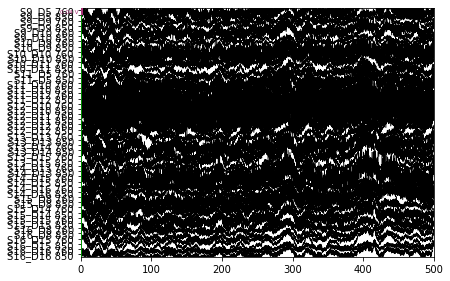

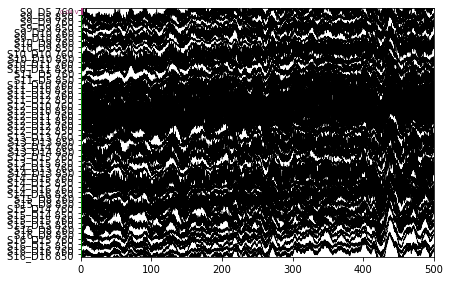

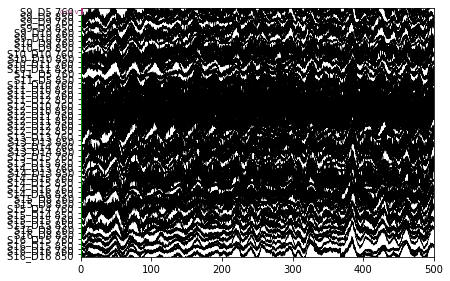

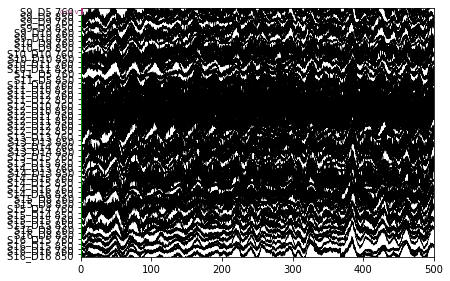

In [26]:
raw_od1 = mne.preprocessing.nirs.optical_density(motor_raw["session1"])
raw_od2 = mne.preprocessing.nirs.optical_density(motor_raw["session2"])
raw_od3 = mne.preprocessing.nirs.optical_density(motor_raw["session3"])

raw_od1.plot(n_channels=len(raw_od1.ch_names),
            duration=500, show_scrollbars=False)
raw_od2.plot(n_channels=len(raw_od2.ch_names),
            duration=500, show_scrollbars=False)
raw_od3.plot(n_channels=len(raw_od3.ch_names),
            duration=500, show_scrollbars=False)

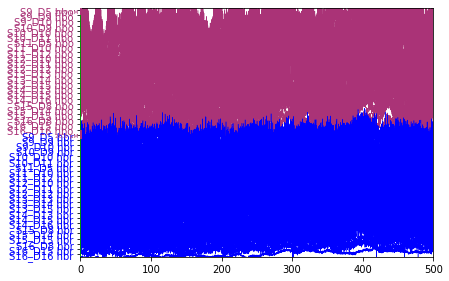

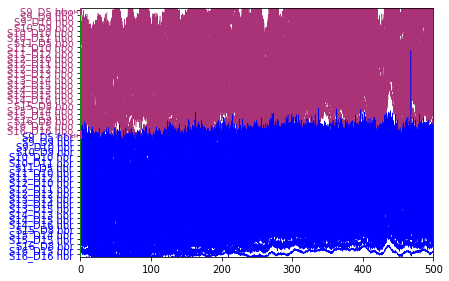

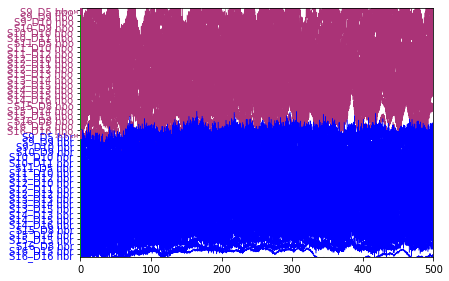

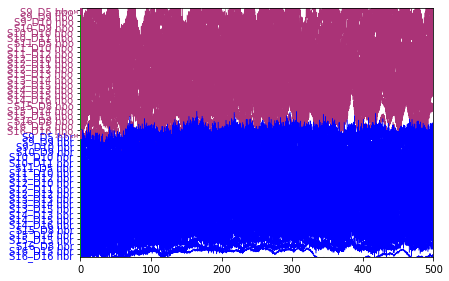

In [27]:
raw1_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od1)
raw2_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od2)
raw3_haemo = mne.preprocessing.nirs.beer_lambert_law(raw_od3)

raw1_haemo.plot(n_channels=len(raw1_haemo.ch_names),
               duration=500, show_scrollbars=False)
raw2_haemo.plot(n_channels=len(raw2_haemo.ch_names),
               duration=500, show_scrollbars=False)
raw3_haemo.plot(n_channels=len(raw3_haemo.ch_names),
               duration=500, show_scrollbars=False)

In [28]:
raw1_haemo.info

<Info | 7 non-empty values
 bads: []
 ch_names: S9_D5 hbo, S9_D5 hbr, S9_D9 hbo, S9_D9 hbr, S9_D10 hbo, S9_D10 ...
 chs: 24 HBO, 24 HBR
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 5.0 Hz
 meas_date: unspecified
 nchan: 48
 projs: []
 sfreq: 10.0 Hz
>

Effective window size : 204.800 (s)
Effective window size : 204.800 (s)


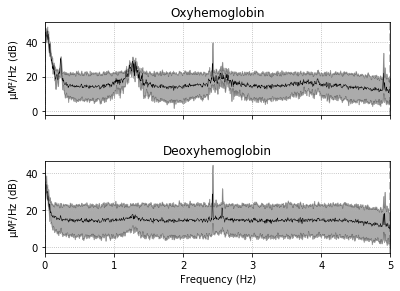

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 0.10 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.10 Hz)
- Filter length: 3301 samples (330.100 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passba

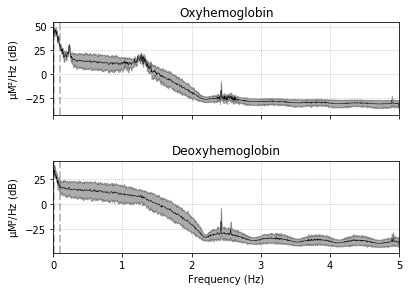

In [29]:
#Band-pass HbO and HbR from 0.01Hz to 0.1 Hz
fig = raw1_haemo.plot_psd(average=True)
fig.suptitle('Before filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)
raw1_haemo = raw1_haemo.filter(0.01, 0.1, h_trans_bandwidth='auto',
                             l_trans_bandwidth='auto')
raw2_haemo = raw2_haemo.filter(0.01, 0.1, h_trans_bandwidth='auto',
                             l_trans_bandwidth='auto')
raw3_haemo = raw3_haemo.filter(0.01, 0.1, h_trans_bandwidth='auto',
                             l_trans_bandwidth='auto')
fig = raw1_haemo.plot_psd(average=True)
fig.suptitle('After filtering', weight='bold', size='x-large')
fig.subplots_adjust(top=0.88)

In [30]:
raw1_haemo.info

<Info | 7 non-empty values
 bads: []
 ch_names: S9_D5 hbo, S9_D5 hbr, S9_D9 hbo, S9_D9 hbr, S9_D10 hbo, S9_D10 ...
 chs: 24 HBO, 24 HBR
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 0.1 Hz
 meas_date: unspecified
 nchan: 48
 projs: []
 sfreq: 10.0 Hz
>

In [31]:
#Extracting Epochs
filename = r"C:\Users\bio86\Downloads\NIRS_01-29\subject 19\mrk.mat"
matlab_mrk = loadmat(filename)
nirs_events1=np.transpose(np.vstack(
        ((matlab_mrk['mrk'][0][0][0][0][0][0])/100,
         np.vstack((np.zeros(20),np.transpose(matlab_mrk['mrk'][0][0][0][0][1][0][0][0])[0])))))
nirs_events2=np.transpose(np.vstack(
        ((matlab_mrk['mrk'][0][2][0][0][0][0])/100,
         np.vstack((np.zeros(20),np.transpose(matlab_mrk['mrk'][0][2][0][0][1][0][0][0])[0])))))
nirs_events3=np.transpose(np.vstack(
        ((matlab_mrk['mrk'][0][4][0][0][0][0])/100,
         np.vstack((np.zeros(20),np.transpose(matlab_mrk['mrk'][0][4][0][0][1][0][0][0])[0])))))

In [32]:
#Information about the events
event_id = dict(LMI=1, RMI=2)

In [33]:
#Create epochs objects and perform Baseline correction
epochs1 = mne.Epochs(raw1_haemo, events=nirs_events1.astype(int),tmin=-10,tmax=25,
                     event_id=event_id,proj=True, baseline=(-5, -2),
                     preload=True,detrend=None, verbose=True)
epochs2 = mne.Epochs(raw1_haemo,  events=nirs_events2.astype(int),tmin=-10,tmax=25,
                     event_id=event_id,proj=True, baseline=(-5, -2),
                     preload=True,detrend=None, verbose=True)
epochs3 = mne.Epochs(raw1_haemo, events=nirs_events3.astype(int),tmin=-10,tmax=25,
                     event_id=event_id,proj=True, baseline=(-5, -2),
                     preload=True,detrend=None, verbose=True)


20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 351 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 351 original time points ...
0 bad epochs dropped
20 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 20 events and 351 original time points ...
0 bad epochs dropped


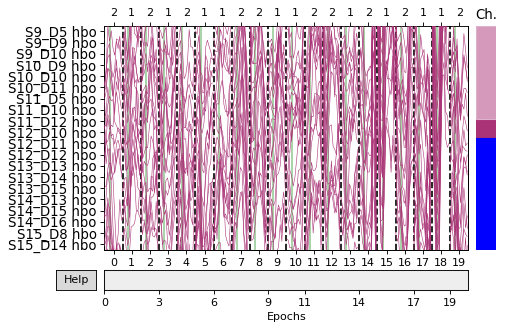

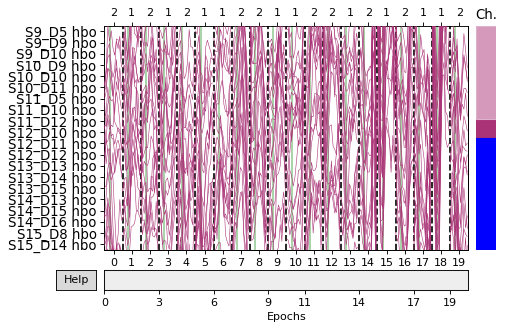

In [34]:
epochs1.plot()

In [35]:
#Concatenate raws
epochs = mne.concatenate_epochs((epochs1,epochs2,epochs3),add_offset=True)

60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 bad epochs dropped


In [36]:
epochs.info

<Info | 7 non-empty values
 bads: []
 ch_names: S9_D5 hbo, S9_D5 hbr, S9_D9 hbo, S9_D9 hbr, S9_D10 hbo, S9_D10 ...
 chs: 24 HBO, 24 HBR
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 0.1 Hz
 meas_date: unspecified
 nchan: 48
 projs: []
 sfreq: 10.0 Hz
>

In [37]:
#Separate hbo and hbr
epochs_hbo = epochs.copy().pick(list(range(0, 48,2)))
epochs_hbr = epochs.copy().pick(list(range(1, 48,2)))

In [38]:
'''def percent_change(values):
"""Calculates the % change between the last value
and the mean of previous values"""
# Separate the last value and all previous values into variables
previous_values = values[:-1]
last_value = values[-1]
# Calculate the % difference between the last value
# and the mean of earlier values
percent_change = (last_value - np.mean(previous_values)) \
/ np.mean(previous_values)
return percent_change'''

'def percent_change(values):\n"""Calculates the % change between the last value\nand the mean of previous values"""\n# Separate the last value and all previous values into variables\nprevious_values = values[:-1]\nlast_value = values[-1]\n# Calculate the % difference between the last value\n# and the mean of earlier values\npercent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)\nreturn percent_change'

In [39]:
'''# Plot the raw data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = prices.plot(ax=axs[0])
# Calculate % change and plot
ax = prices.rolling(window=20).aggregate(percent_change).plot(ax=axs[1])
ax.legend_.set_visible(False)'''

'# Plot the raw data\nfig, axs = plt.subplots(1, 2, figsize=(10, 5))\nax = prices.plot(ax=axs[0])\n# Calculate % change and plot\nax = prices.rolling(window=20).aggregate(percent_change).plot(ax=axs[1])\nax.legend_.set_visible(False)'

In [40]:
'''#Feature extraction

# Calculate a rolling window, then extract two features
feats = pd.DataFrame(epochs.get_data()).rolling(20).aggregate([np.std, np.max]).dropna()
print(feats.head(3))'''

'#Feature extraction\n\n# Calculate a rolling window, then extract two features\nfeats = pd.DataFrame(epochs.get_data()).rolling(20).aggregate([np.std, np.max]).dropna()\nprint(feats.head(3))'

In [41]:
'''#Class with moving time window

ival_epo  = [-10 25]; #epoch range (unit: msec)
ival_base = [-5 -2]; #baseline correction range (unit: msec)

StepSize = 1; #msec
WindowSize = 3; #msec

ival_start = (ival_epo[1]:StepSize:ival_epo(end)-WindowSize)';
ival_end = ival_start+WindowSize;
ival = [ival_start, ival_end];
nStep = length(ival);'''


"#Class with moving time window\n\nival_epo  = [-10 25]; #epoch range (unit: msec)\nival_base = [-5 -2]; #baseline correction range (unit: msec)\n\nStepSize = 1; #msec\nWindowSize = 3; #msec\n\nival_start = (ival_epo[1]:StepSize:ival_epo(end)-WindowSize)';\nival_end = ival_start+WindowSize;\nival = [ival_start, ival_end];\nnStep = length(ival);"

In [42]:
'''#cross-validation (nShift x nFold-fold cross-validation)
#for more convenient use, please refer to 'https://github.com/bbci/bbci_public/blob/master/demos/demo_validation_csp.m'
#cross-validation below was written for meta-classification for EEG-NIRS hybrid BCI
group.imag = epo.imag.deoxy.y; #% epo.imag.deoxy.y == epo.imag.oxy.y
group.ment = epo.ment.deoxy.y; #% epo.ment.deoxy.y == epo.ment.oxy.y'''

"#cross-validation (nShift x nFold-fold cross-validation)\n#for more convenient use, please refer to 'https://github.com/bbci/bbci_public/blob/master/demos/demo_validation_csp.m'\n#cross-validation below was written for meta-classification for EEG-NIRS hybrid BCI\ngroup.imag = epo.imag.deoxy.y; #% epo.imag.deoxy.y == epo.imag.oxy.y\ngroup.ment = epo.ment.deoxy.y; #% epo.ment.deoxy.y == epo.ment.oxy.y"

## CSP Classification

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

In [44]:
#Install StackingCVClassifier from MLXTEND

In [45]:
test = epochs.copy()

In [46]:
event_id

{'LMI': 1, 'RMI': 2}

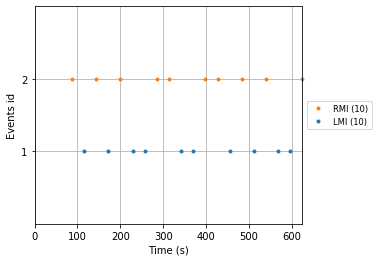

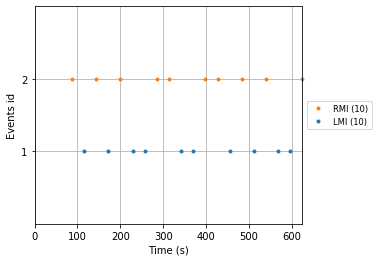

In [47]:
# plot events
mne.viz.plot_events(nirs_events1, event_id=event_id,
                    sfreq=epochs.info['sfreq'])

In [48]:
# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs_train = test.copy().crop(tmin=1, tmax=2)
labels = test.events[:, -1]

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mne.decoding import Vectorizer, get_coef
from mne.decoding import LinearModel

# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = test.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

print(cv_split)
#for train_index, test_index in cv.split(epochs_data):
 #   print("TRAIN:", train_index, "TEST:", test_index)
# Assemble a classifier
#lda = LinearDiscriminantAnalysis(solver="lsqr",shrinkage='auto')
#csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([('CSP', csp), ('LDA', lda)])
#clf = Pipeline([('LDA', lda)])
clf = make_pipeline(
    Vectorizer(),                       # 1) vectorize across time and channels
    StandardScaler(),                   # 2) normalize features across trials
    LinearModel(
        LinearDiscriminantAnalysis(solver="lsqr",shrinkage='auto')))  # 3) fits a logistic regression
#x=lda.fit(epochs_data_train,)
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))


<generator object BaseShuffleSplit.split at 0x000002143A5CE2C8>
Classification accuracy: 0.725000 / Chance level: 0.500000


In [50]:
test_hbo = epochs_hbo.copy()
epochs_train = test_hbo.copy().crop(tmin=1, tmax=2)
labels = test_hbo.events[:, -1]

In [51]:
#HBO Alone

# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = test_hbo.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

print(cv_split)
#for train_index, test_index in cv.split(epochs_data):
 #   print("TRAIN:", train_index, "TEST:", test_index)
# Assemble a classifier
#lda = LinearDiscriminantAnalysis(solver="lsqr",shrinkage='auto')
#csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([('CSP', csp), ('LDA', lda)])
#clf = Pipeline([('LDA', lda)])
clf = make_pipeline(
    Vectorizer(),                       # 1) vectorize across time and channels
    StandardScaler(),                   # 2) normalize features across trials
    LinearModel(
        LinearDiscriminantAnalysis(solver="lsqr",shrinkage='auto')))  # 3) fits a logistic regression
#x=lda.fit(epochs_data_train,)
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))


<generator object BaseShuffleSplit.split at 0x000002143A5CED48>
Classification accuracy: 0.575000 / Chance level: 0.500000


In [52]:
test_hbr = epochs_hbr.copy()
epochs_train = test_hbr.copy().crop(tmin=1, tmax=2)
labels = test_hbr.events[:, -1]

In [53]:
#HBR Alone

# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = test_hbr.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

print(cv_split)
#for train_index, test_index in cv.split(epochs_data):
 #   print("TRAIN:", train_index, "TEST:", test_index)
# Assemble a classifier
#lda = LinearDiscriminantAnalysis(solver="lsqr",shrinkage='auto')
#csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([('CSP', csp), ('LDA', lda)])
#clf = Pipeline([('LDA', lda)])
clf = make_pipeline(
    Vectorizer(),                       # 1) vectorize across time and channels
    StandardScaler(),                   # 2) normalize features across trials
    LinearModel(
        LinearDiscriminantAnalysis(solver="lsqr",shrinkage='auto')))  # 3) fits a logistic regression
#x=lda.fit(epochs_data_train,)
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=1)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))


<generator object BaseShuffleSplit.split at 0x000002143A5F7748>
Classification accuracy: 0.708333 / Chance level: 0.500000


In [ ]:
def slopeAcrossTime(epoch,interval,clab)



In [54]:
function epo= proc_slopeAcrossTime(epo, ival, clab)
%PROC_SLOPEACROSSTIME - Average slope of signals across a specified time interval
%
%Synopsis:
%  EPO= proc_slopeAcrossTime(EPO, <IVAL>, <CLAB>)
%
%Arguments:
%  DAT  - data structure of epoched data
%  IVAL - interval in which the average is to be calculated,
%         default [] which means the whole time range
%  CLAB - cell array of channels to be selected, default all
%
%Returns:
%  DAT  - updated data structure


misc_checkType(epo, 'STRUCT(x)');
misc_checkTypeIfExists('ival', 'DOUBLE[2]');
misc_checkTypeIfExists('clab', 'CHAR|CELL{CHAR}');

if nargin<2,
  ival= [];
end
if nargin<3,
  clab= {};
end

if isempty(ival),
  idx= 1:size(epo.x,1);
else
  idx= util_timeind(epo, ival);
end
epo.x= mean(diff(epo.x(idx,:,:)),1);
if isfield(epo, 't') && length(idx)>1,
  epo.t= mean(epo.t(idx(1:end-1)));
end

if ~isempty(clab),
  epo= proc_selectChannels(epo, clab);
end